# Wave Propagation Method and BPM in 3D

WPM method is very fast. It is based on S. Schmidt et al., “Wave-optical modeling beyond the thin-element-approximation,” Opt. Express, vol. 24, no. 26, p. 30188, 2016.


In [1]:
from diffractio import np, plt, sp, um, mm, degrees
from diffractio.scalar_fields_XYZ import Scalar_field_XYZ

from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_masks_XYZ import Scalar_mask_XYZ

## Propagation at vacuum

In [2]:
x = np.linspace(-50 * um, 50 * um, 256)
y = np.linspace(-50 * um, 50 * um, 256)
z = np.linspace(0, 500 * um, 256)
wavelength = .6 * um


In [3]:
t0 = Scalar_mask_XY(x, y, wavelength)
t0.circle(r0=(0, 0), radius=45 * um, angle=0)


In [4]:
u = Scalar_mask_XYZ(x, y, z, wavelength)
u.incident_field(u0=t0)

## WPM

In [5]:
%%time
u.clear_field()
u.WPM(verbose=True, has_edges=True)


Time = 6.44 s, time/loop = 25.17 ms
CPU times: user 5.88 s, sys: 730 ms, total: 6.61 s
Wall time: 6.58 s


<Figure size 432x288 with 0 Axes>

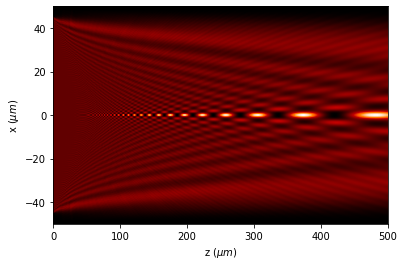

In [6]:
u.draw_XZ(y0=0, logarithm=False)

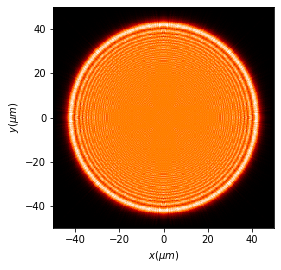

In [7]:
u.draw_XY(z0=20, logarithm=True)

In [8]:
# u.draw_XYZ()

## BPM

CPU times: user 2.61 s, sys: 120 ms, total: 2.73 s
Wall time: 2.72 s


<Figure size 432x288 with 0 Axes>

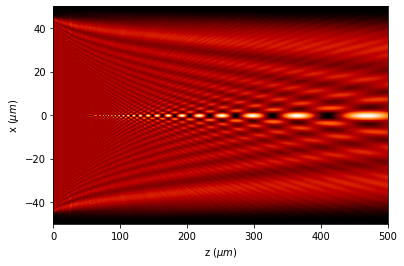

In [9]:
%%time
u.clear_field()
u.BPM(verbose=True, has_edges=True)
u.draw_XZ(y0=0, logarithm=True);

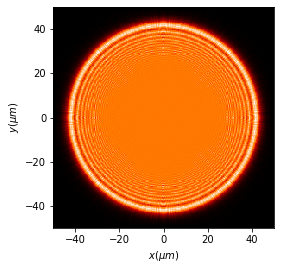

In [10]:
u.draw_XY(z0=20, logarithm=True)

At vacuum both techniques work fine.

## Diffraction by an sphere

WPM and BPM also allow propagation through a XYZ refraction index structure.


In [11]:
x = np.linspace(-15 * um, 15 * um, 256)
y = np.linspace(-15 * um, 15 * um, 256)
z = np.linspace(0, 30 * um, 256)
wavelength = 0.6328 * um


In [12]:
t0 = Scalar_mask_XY(x, y, wavelength)
t0.circle(r0=(0, 0), radius=12.5 * um, angle=0)

u0 = Scalar_source_XY(x, y, wavelength)
u0.plane_wave(A=1)

In [13]:
u = Scalar_mask_XYZ(x, y, z, wavelength)
u.sphere(r0=(0, 0, 12.5), radius=10 * um, refraction_index=2, angles=(0, 0, 0))


In [14]:
u.incident_field(u0=u0 * t0)


In [15]:
# u.draw_refraction_index()

### WPM

In [16]:
%%time
u.clear_field()
u.WPM(verbose=True,has_edges=True)

Time = 7.79 s, time/loop = 30.42 ms
CPU times: user 7.86 s, sys: 117 ms, total: 7.97 s
Wall time: 7.93 s


<Figure size 432x288 with 0 Axes>

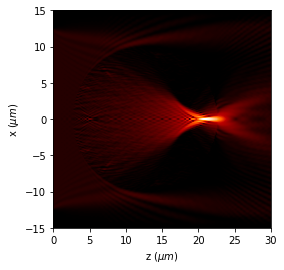

In [17]:
u.draw_XZ(y0=0, logarithm=True, scale='scaled')


In [18]:
u2 = u.cut_resample([-10, 10], [-10, 10],
                    num_points=(128, 128, 128),
                    new_field=True)


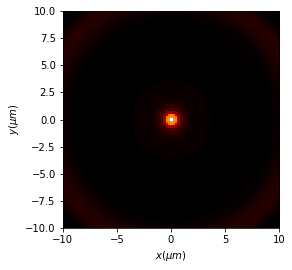

In [19]:
u2.draw_XY(z0=20.5, logarithm=True)

In [20]:
# u.draw_XYZ(logarithm=True)

### BPM

In [21]:
%%time
u.clear_field()
u.BPM(verbose=True,has_edges=True)

CPU times: user 2.8 s, sys: 140 ms, total: 2.94 s
Wall time: 2.98 s


<Figure size 432x288 with 0 Axes>

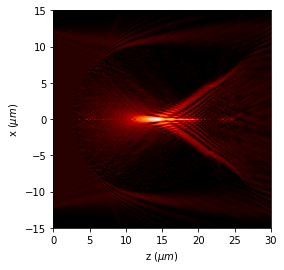

In [22]:
u.draw_XZ(y0=0, scale='scaled', logarithm=True)


In this case, the results are quite different. As the difference of refraction indexes is high, WPM produces better results.